# Finance Data Project

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to demonstrate visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

This is my solution to a Data Capstone Project for the Udemy Course "Data Science and Machine Learning Bootcamp"

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
bank_stocks = pd.read_pickle('all_banks')
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

## EDA

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Now, we'll see the returns for each stock as part of a new dataframe.

In [9]:
returns = pd.DataFrame()

In [17]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


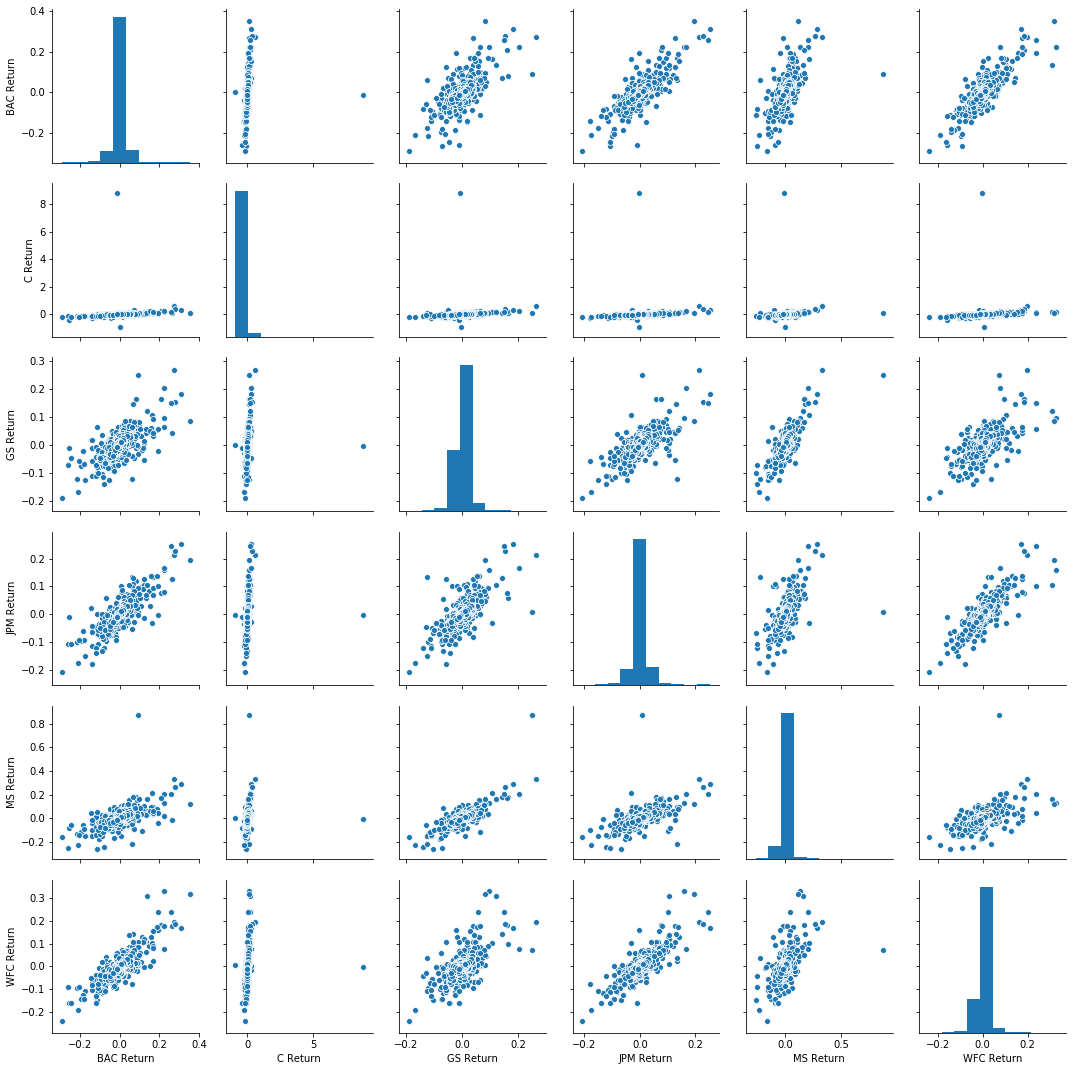

In [18]:
sns.pairplot(data=returns[1:])

Most returns have a positive correlation among themselves except for Citigroup's returns. This is attributed to the stock prize crash of 2008. Using this returns DataFrame, we'll go deeper into when each bank stock had the best and worst single day returns.

In [24]:
returns.idxmax() # To see when each bank had their best returns in single day. 

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [25]:
returns.idxmin() 

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

Most banks had their best and worst day near or around the 2008 financial crisis, which makes sense. However, Citigroup had both its best and worst day in 2011. 

 In May 6th 2011 Citigroup had a 1-to-10 reverse stock split in which they were reinstating the yearly dividend of 0.01$ and therefore having their stock price "plunge". However on May 9th it went into effect in which both stocks combine again trading under "C" but having a new CUSIP number. No real "plunge" happened as it was an effort to reduce shares and reinstate the yearly dividend. 

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

Text(0.5, 1.0, 'Distribution of Morgan Stanley Returns')

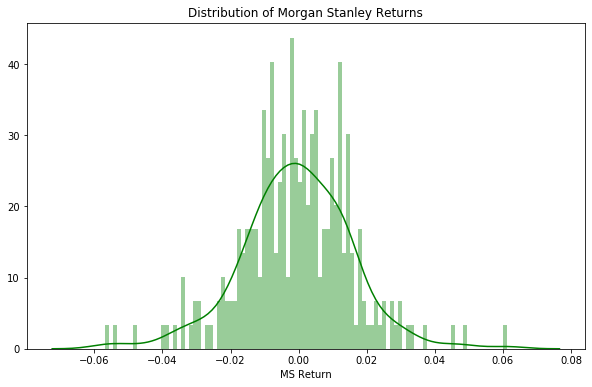

In [33]:
plt.figure(figsize=(10,6))
sns.distplot(returns.loc['2015-01-01': '2015-12-31']['MS Return'], bins=100, color='green')
plt.title('Distribution of Morgan Stanley Returns')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

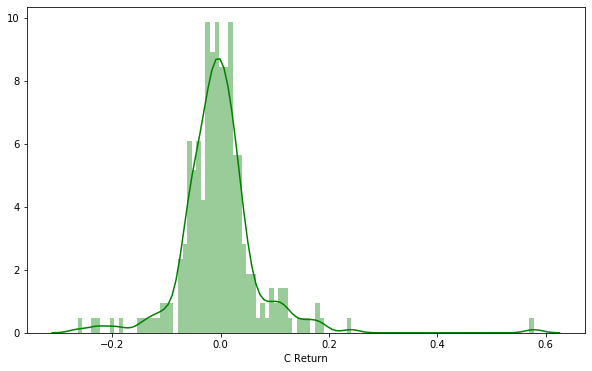

In [42]:
plt.figure(figsize=(10,6))
sns.distplot(returns['2008-01-01':'2008-12-31']['C Return'], bins=100, color='green', label='C Return')

In [43]:
sns.set_style('whitegrid')


# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time.**

In [46]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

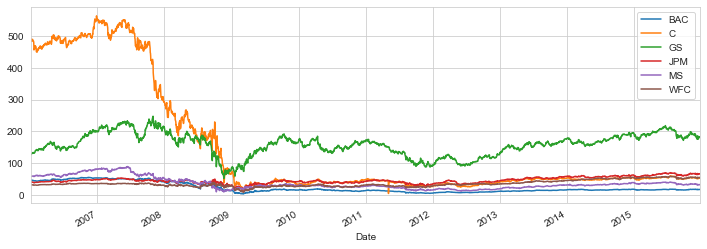

In [53]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend()

In order to make a one-line graph instead of resorting to for loops

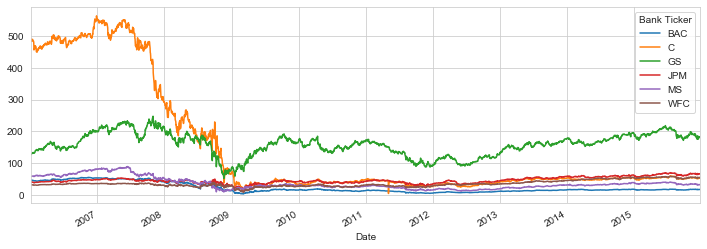

In [52]:
bank_stocks.xs(axis=1, key='Close', level='Stock Info').plot(figsize=(12,4)) 

We can use plotly to make the graph more interactive and easier to extract information.

In [54]:
bank_stocks.xs(axis=1, key='Close', level='Stock Info').iplot()

### Visualizing Bank of America moving average

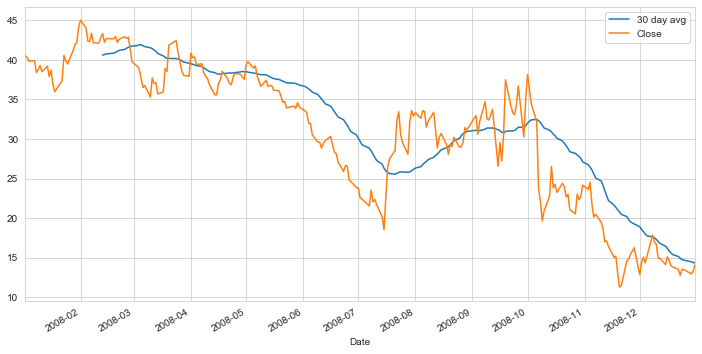

In [59]:
plt.figure(figsize=(12,6))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day avg')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

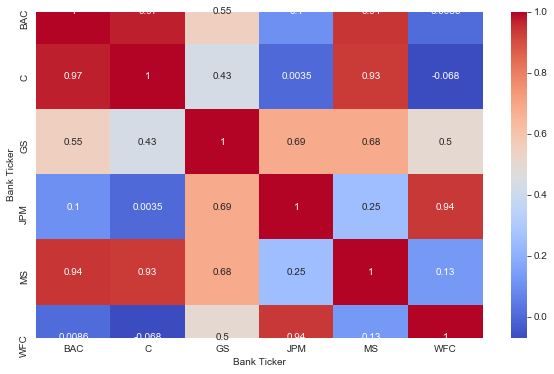

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(bank_stocks.xs(axis=1, key='Close', level='Stock Info').corr(), annot=True, cmap='coolwarm')

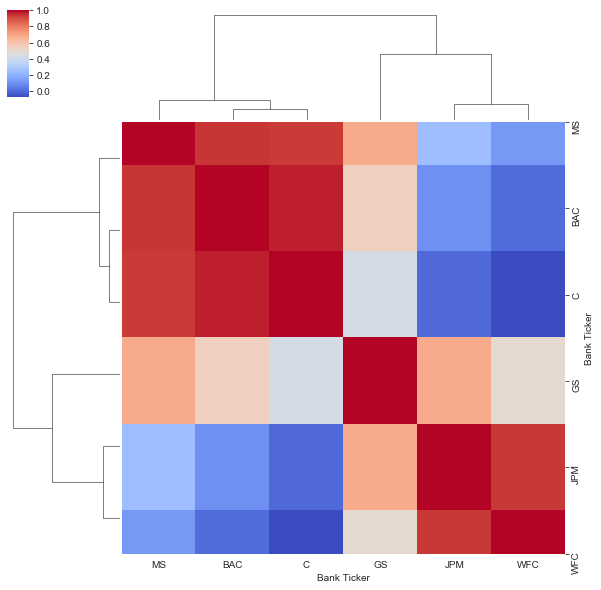

In [62]:
sns.clustermap(bank_stocks.xs(axis=1, key='Close', level='Stock Info').corr(), cmap='coolwarm')

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [64]:
bank_stocks['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [65]:
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55], title='Simple Moving Average')

Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.

In [66]:
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll', title='Bollinger Band Plot')

This concludes the Data Capstone Project for Finance. 